In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

def rmse_function_prophet(df):
    df['ds'] = pd.to_datetime(df['ds'])
    df['hour'] = df['ds'].dt.hour
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['yhat'])**2))
        rmse_adjusted = np.sqrt(np.mean((group['y'] - group['adjusted_y'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
            'RMSE_adjusted_y': rmse_adjusted
        })
    return pd.DataFrame(results)

def rmse_function_rnn(df):
    df['ds'] = pd.to_datetime(df['ds'])
    df['hour'] = df['ds'].dt.hour
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['y_hat'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
        })
    return pd.DataFrame(results)

def rmse_function_rnn2(df):
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['y_hat'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
        })
    return pd.DataFrame(results)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## AEP results

In [2]:
out_dir = 'AEP_results'

In [5]:
print(result3)

         year  month   day  hour      y_hat        y
0      2015.0    1.0   1.0   0.0  13289.351  16375.0
1      2015.0    1.0   1.0   1.0  12730.065  16172.0
2      2015.0    1.0   1.0   2.0  12395.470  15968.0
3      2015.0    1.0   1.0   3.0  12267.252  15749.0
4      2015.0    1.0   1.0   4.0  12274.321  15727.0
...       ...    ...   ...   ...        ...      ...
26299  2017.0   12.0  31.0  19.0  18718.060  19608.0
26300  2017.0   12.0  31.0  20.0  18356.963  19442.0
26301  2017.0   12.0  31.0  21.0  18156.633  19323.0
26302  2017.0   12.0  31.0  22.0  17625.686  19092.0
26303  2017.0   12.0  31.0  23.0  16874.914  18877.0

[26304 rows x 6 columns]


In [3]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_rnn_hybrid.csv')
rmse_rnn1 = rmse_function_rnn(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_yearly.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_hierarchical.csv')
rmse_rnn3 = rmse_function_rnn2(result3)

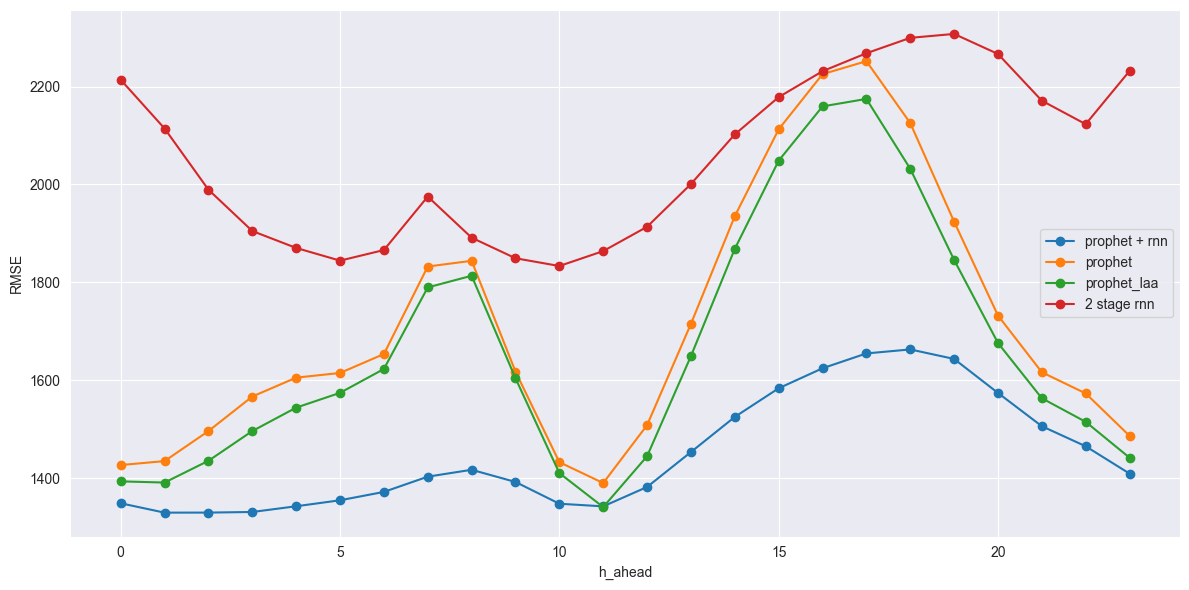

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet + rnn', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='2 stage rnn', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()

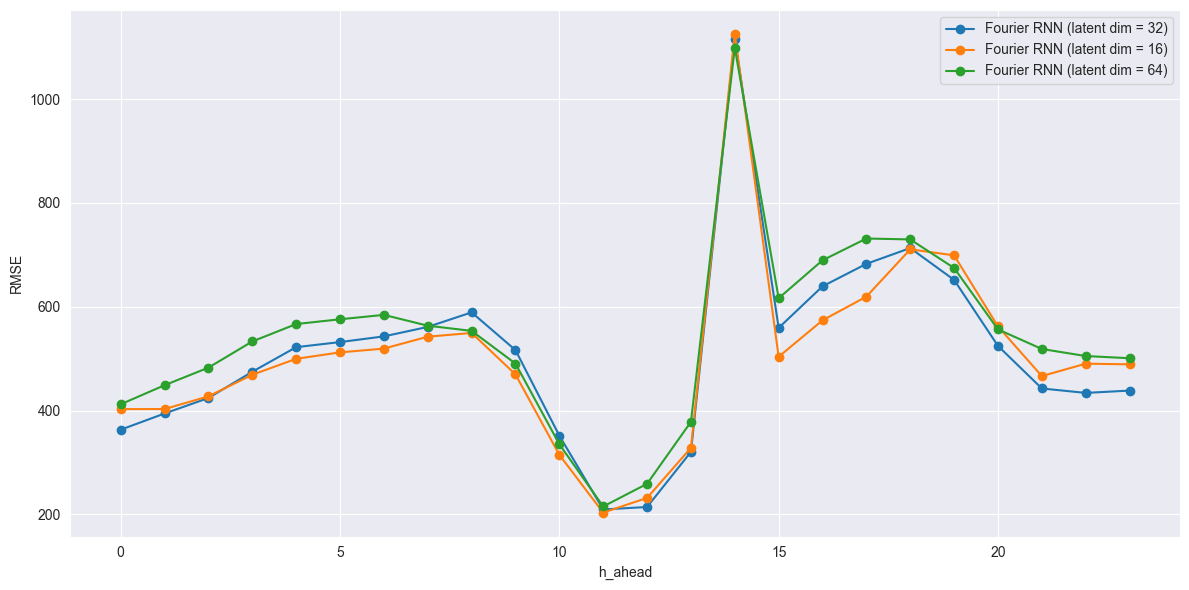

In [7]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_aep.png')
plt.show()

## Comed results

In [9]:
out_dir = 'Comed_results'

In [3]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('new_exp_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

In [4]:
print(rmse_rnn1['RMSE_yhat'].std())
print(rmse_rnn1['RMSE_adjusted_y'].std())
print(rmse_rnn2['RMSE_yhat'].std())
print(rmse_rnn2['RMSE_adjusted_y'].std())
print(rmse_rnn3['RMSE_yhat'].std())
print(rmse_rnn4['RMSE_yhat'].std())
print(rmse_rnn5['RMSE_yhat'].std())
print(rmse_rnn6['RMSE_yhat'].std())
print(rmse_rnn7['RMSE_yhat'].std())

303.19340379831954
123.7059114787073
270.7905289367067
121.96376208596878
63.47204473165681
69.73224322891403
42.19825921428558
48.297761780434584
51.158267583668035


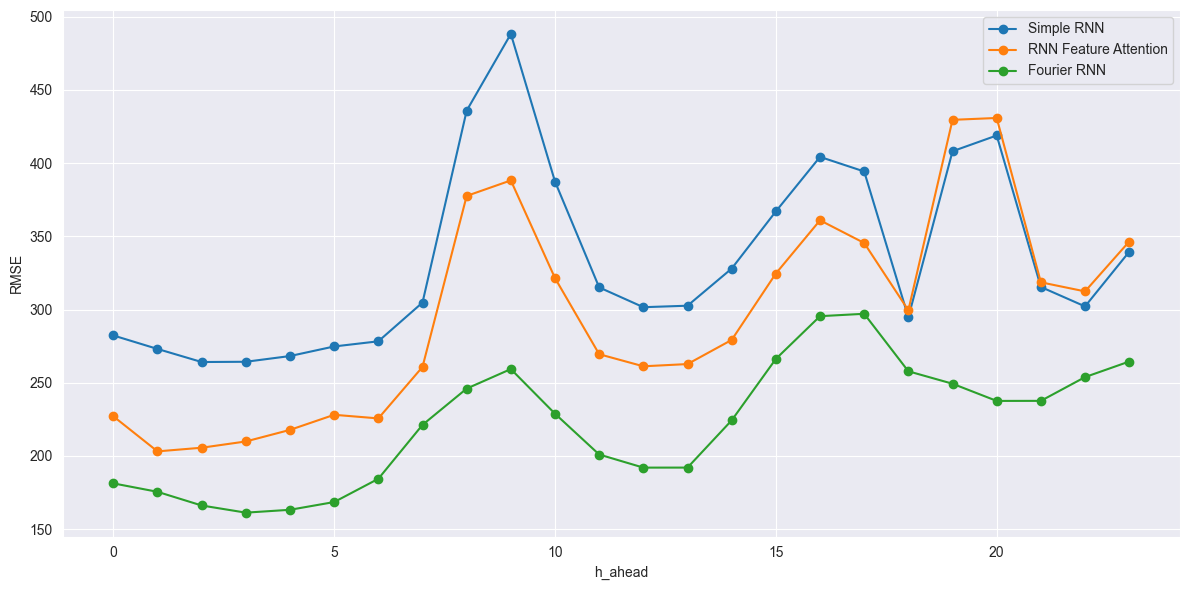

In [5]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_comed.png')
plt.show()

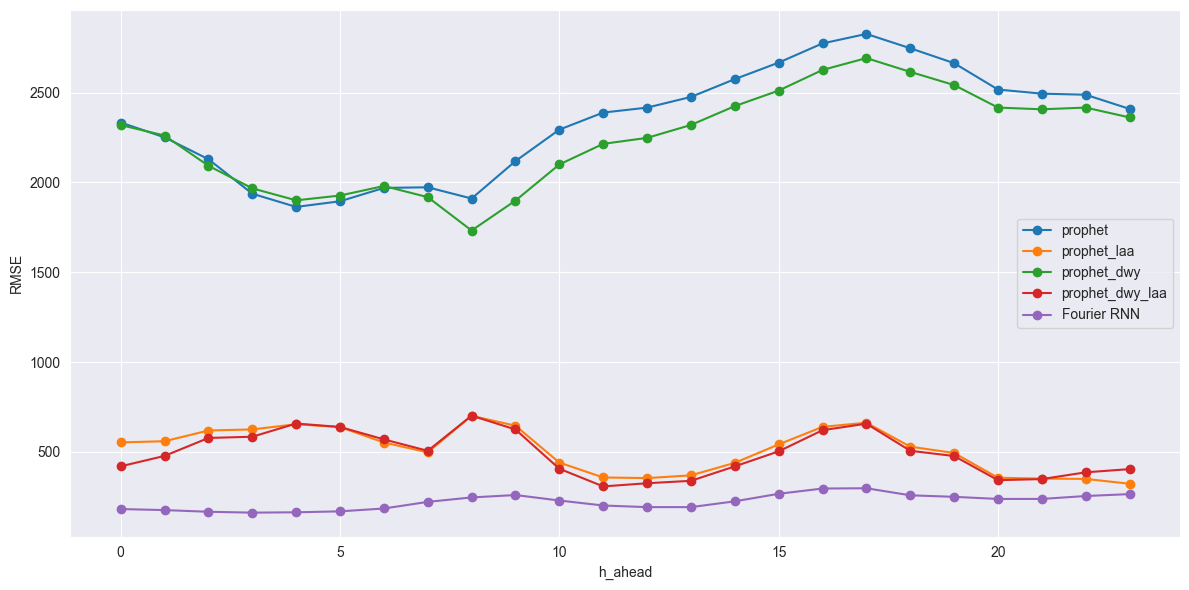

In [7]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_comed.png')
plt.show()

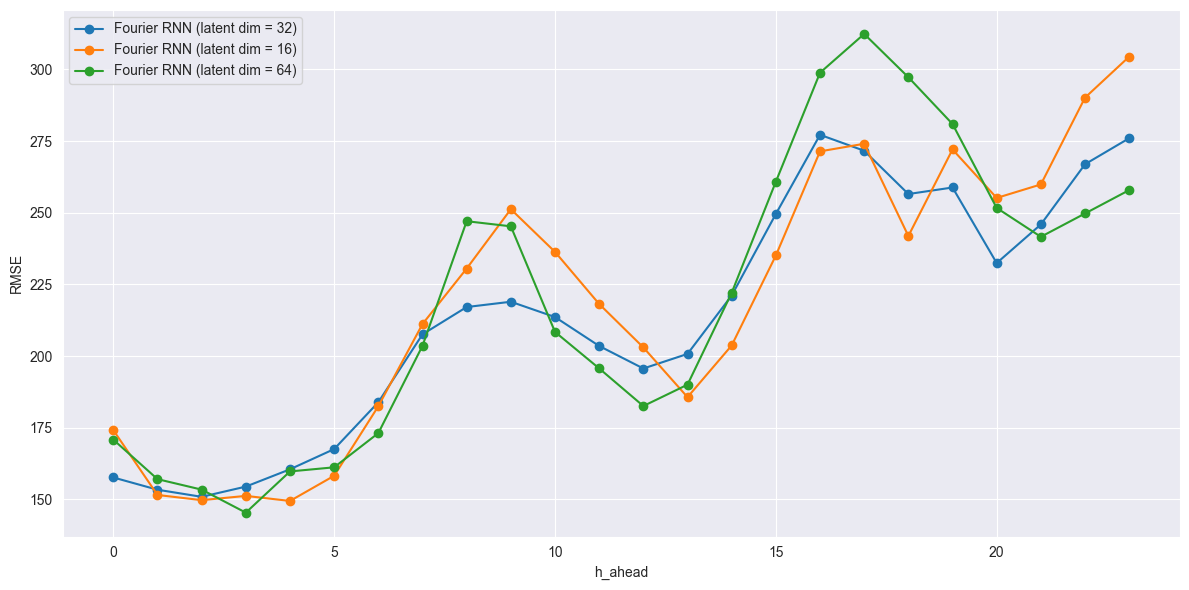

In [13]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_comed.png')
plt.show()

## Dayton Result

In [14]:
out_dir = 'Dayton_results'

In [15]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('new_exp_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

In [16]:
print(rmse_rnn1['RMSE_yhat'].std())
print(rmse_rnn1['RMSE_adjusted_y'].std())
print(rmse_rnn2['RMSE_yhat'].std())
print(rmse_rnn2['RMSE_adjusted_y'].std())
print(rmse_rnn3['RMSE_yhat'].std())
print(rmse_rnn4['RMSE_yhat'].std())
print(rmse_rnn5['RMSE_yhat'].std())
print(rmse_rnn6['RMSE_yhat'].std())
print(rmse_rnn7['RMSE_yhat'].std())

36.13851183367708
24.52556372034201
29.502298328298806
27.05041748330591
21.2429541761674
18.43128220708124
11.787573989637762
12.367632469016977
12.959599811090873


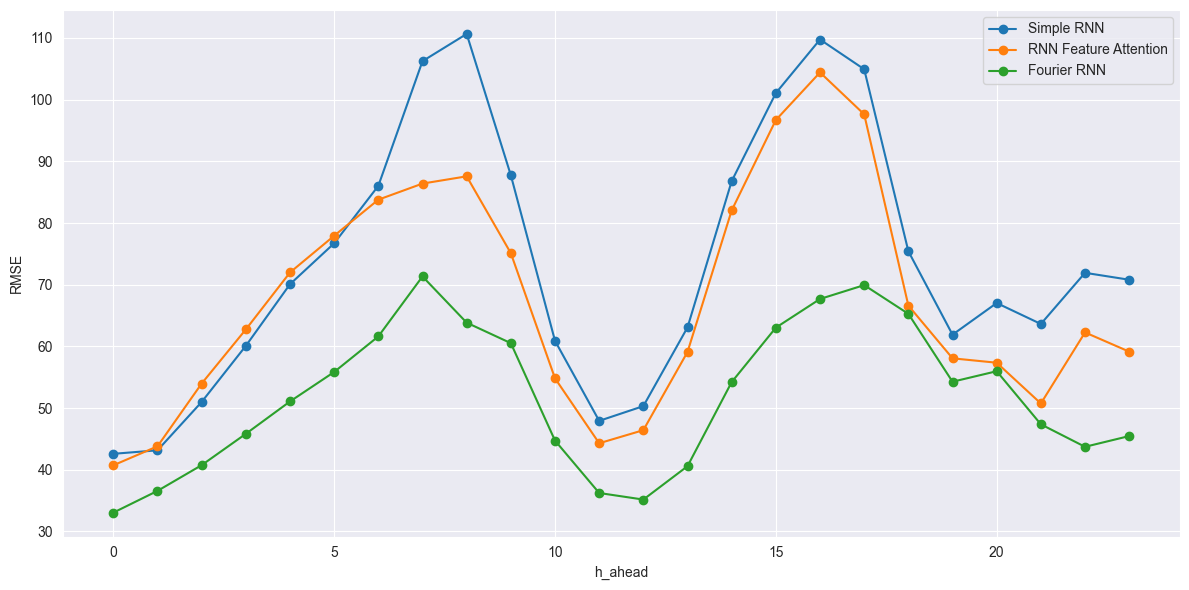

In [17]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_dayton.png')
plt.show()

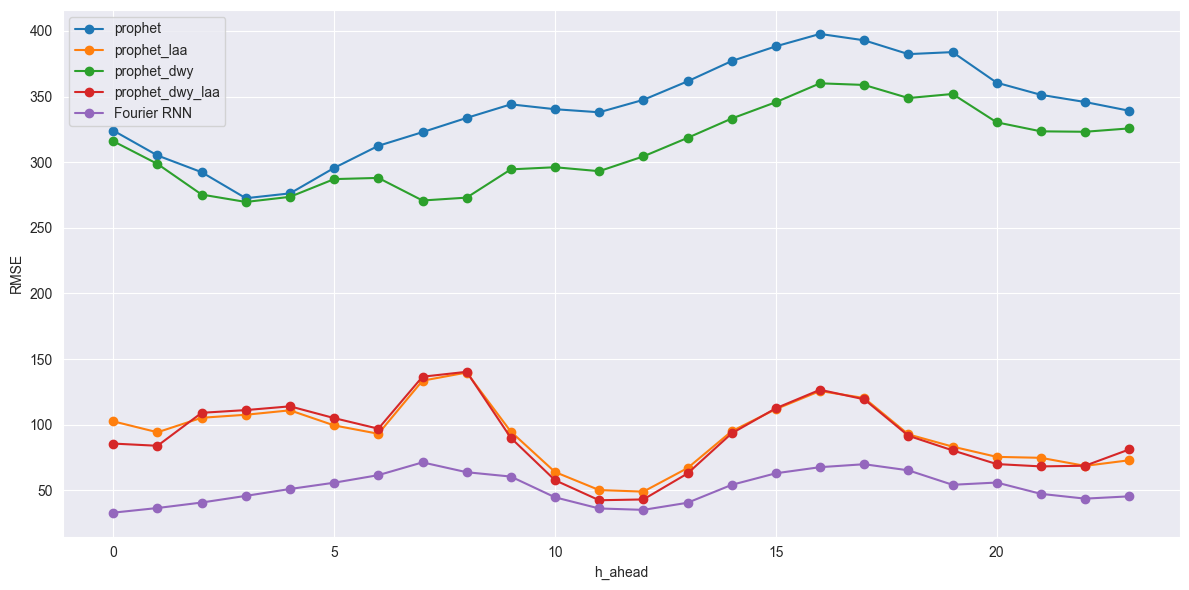

In [18]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_dayton.png')
plt.show()

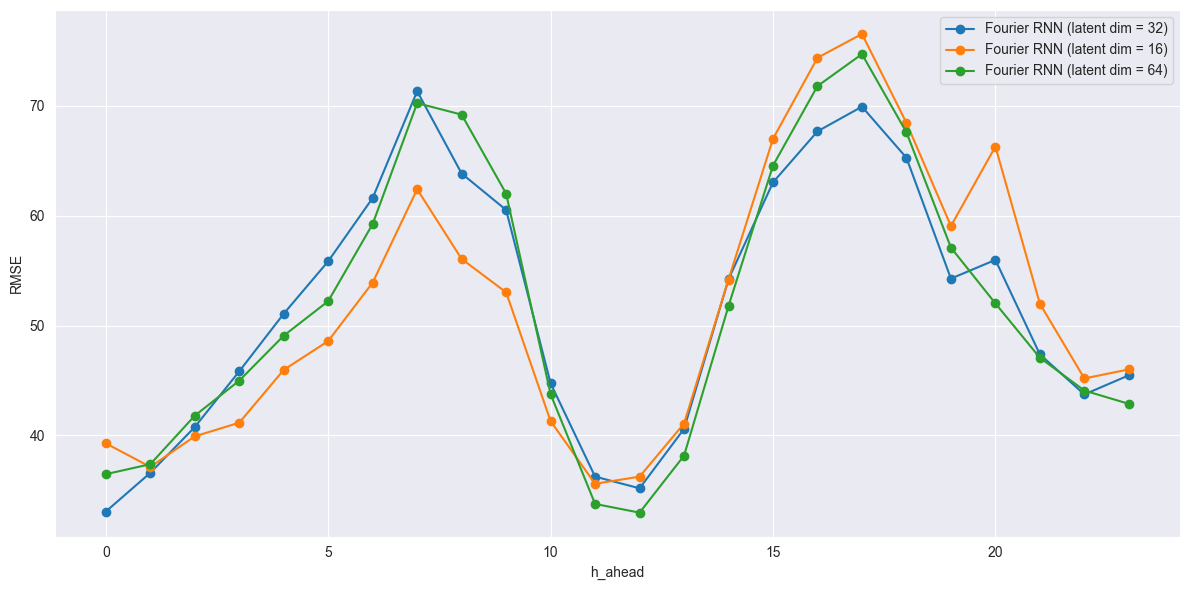

In [19]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_dayton.png')
plt.show()

## Deok Result

In [20]:
out_dir = 'Deok_results'

In [21]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('new_exp_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

In [22]:
print(rmse_rnn1['RMSE_yhat'].std())
print(rmse_rnn1['RMSE_adjusted_y'].std())
print(rmse_rnn2['RMSE_yhat'].std())
print(rmse_rnn2['RMSE_adjusted_y'].std())
print(rmse_rnn3['RMSE_yhat'].std())
print(rmse_rnn4['RMSE_yhat'].std())
print(rmse_rnn5['RMSE_yhat'].std())
print(rmse_rnn6['RMSE_yhat'].std())
print(rmse_rnn7['RMSE_yhat'].std())

51.66828097217602
55.52567492691955
54.30792697864705
55.91676395101363
46.33353841607545
40.55031626260475
21.433580022018518
19.956076875587435
22.220128083004816


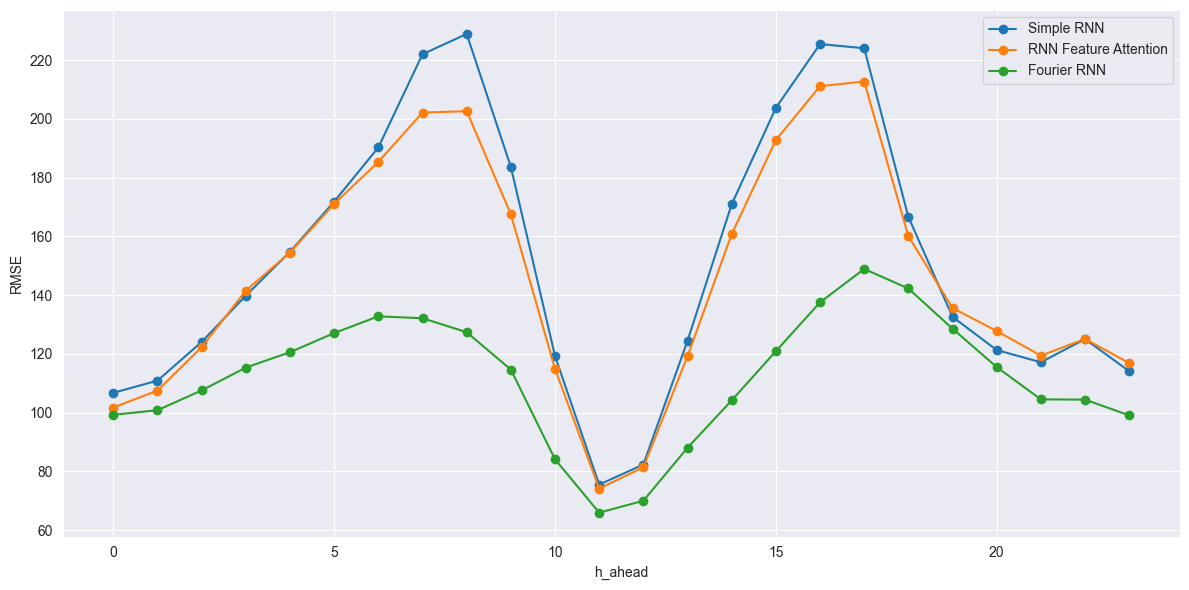

In [23]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_deok.png')
plt.show()

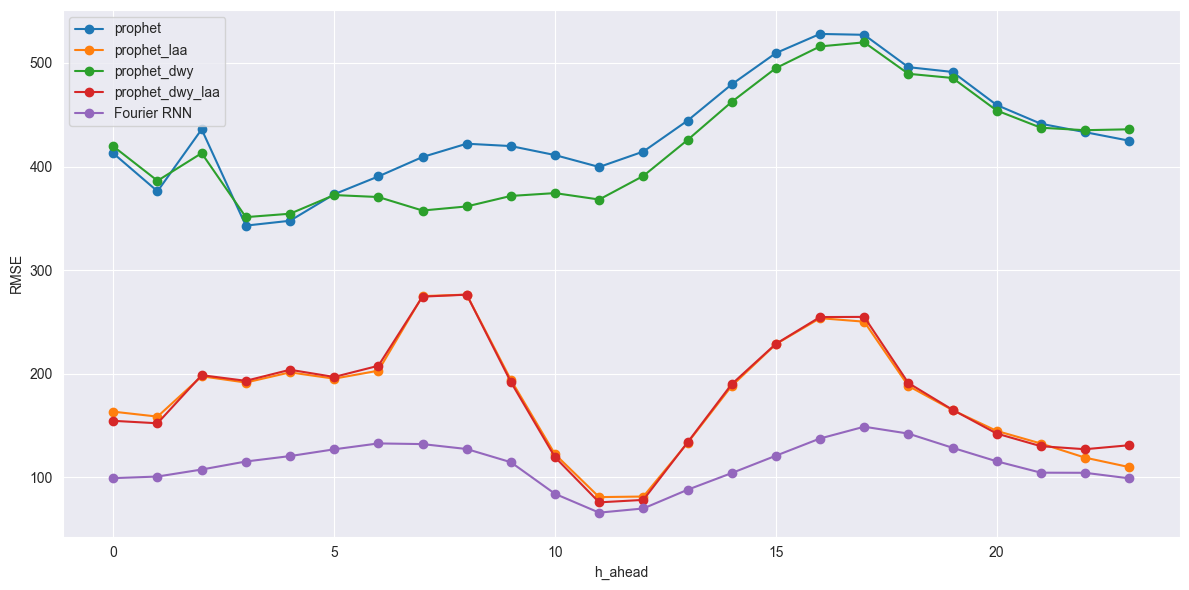

In [24]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_deok.png')
plt.show()

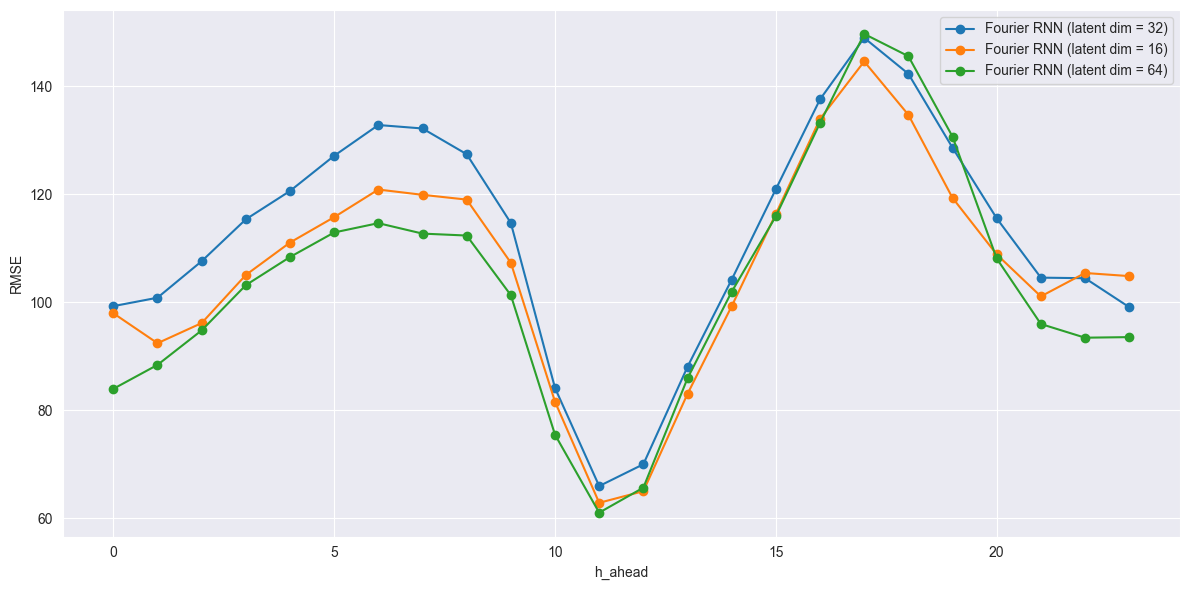

In [25]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_deok.png')
plt.show()